## Data Loading

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('trending.csv')
df = df.dropna(axis=1, how='all')
df

,publish_time,channel_id,title,description,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",SMTOWN,NaN,10,none,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",PT5M7S,2d,hd,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,none,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",PT42M30S,2d,hd,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,none,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,PT46M43S,2d,hd,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,yb,NaN,20,none,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,PT45M59S,2d,hd,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,none,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",PT5M12S,2d,hd,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16718,2021-06-04T15:45:00Z,UC24_Z2L-8Ki183AI9zJJzNQ,Interogasi Shandy Aulia | LAPOR PAK! (04/06/21...,"LAPOR PAK!\nJumat, 4 Juni 2021\n\nPART 1 : htt...",TRANS7 OFFICIAL,"['TRANS7', 'TRANSMEDIA', '#StayHome', '#WithMe...",24,none,Interogasi Shandy Aulia | LAPOR PAK! (04/06/21...,"LAPOR PAK!\nJumat, 4 Juni 2021\n\nPART 1 : htt...",PT14M51S,2d,hd,False,True,NaN,NaN,524661.0,7650.0,182.0,0,807.0,2021-06-07 06:02:35.153544+00:00
16719,2021-05-28T11:00:12Z,UCcQaaKfBlPvMn_aRUHkQjLA,Mahen - Putus Saja (Official Lyric Video),Official Lyric Video 'Putus Saja' by Mahen\nSu...,Indo Semar Sakti,"['arloji', 'dirimu tak pernah menganggap', 'fo...",10,none,Mahen - Putus Saja (Official Lyric Video),Official Lyric Video 'Putus Saja' by Mahen\nSu...,PT5M7S,2d,hd,False,True,NaN,NaN,428304.0,22608.0,118.0,0,1038.0,2021-06-07 06:02:35.153561+00:00
16720,2021-06-03T12:00:04Z,UCWGNHePUJW56gsPniGj5OEg,霸道總裁羞辱單親媽媽，竟讓她當眾穿性感制服 💖 中国电视剧,Subscribe for more Videos 订阅频道: https://www.yo...,甜剧小屋,"['甜剧小屋', 'chinese television dramas', 'chinese...",22,none,霸道總裁羞辱單親媽媽，竟讓她當眾穿性感制服 💖 中国电视剧,Subscribe for more Videos 订阅频道: https://www.yo...,PT10M7S,2d,hd,True,True,NaN,['VN'],1590934.0,20859.0,681.0,0,897.0,2021-06-07 06:02:35.153577+00:00
16721,2021-06-04T04:00:01Z,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter (Cooler Remix)' Official MV,BTS (방탄소년단) 'Butter (Cooler Remix)' Official M...,HYBE LABELS,"['BIGHIT', '빅히트', '방탄소년단', 'BTS', 'BANGTAN', '...",10,none,BTS (방탄소년단) 'Butter (Cooler Remix)' Official MV,BTS (방탄소년단) 'Butter (Cooler Remix)' Official M...,PT3M3S,2d,hd,True,True,NaN,NaN,15576473.0,2758584.0,8073.0,0,105380.0,2021-06-07 06:02:35.153595+00:00


## Columns with missing values and columns without missing value

In [3]:
any_null_columns = df.columns[df.isnull().any()]
non_null_columns = df.columns[df.isnull().any() == False]

print("Columns with missing value ", ", ".join([col for col in any_null_columns]))
print("Columns without missing value", ", ".join([col for col in non_null_columns]))

Columns with missing value  description, tags, local_description, allowed_region, blocked_region, view, like, dislike, comment
Columns without missing value publish_time, channel_id, title, channel_name, category_id, live_status, local_title, duration, dimension, definition, caption, license_status, favorite, trending_time


## Missing value percentage in each column

In [4]:
df.isnull().sum()/len(df)*100

publish_time          0.000000
channel_id            0.000000
title                 0.000000
description           2.027148
channel_name          0.000000
tags                 11.074568
category_id           0.000000
live_status           0.000000
local_title           0.000000
local_description     2.027148
duration              0.000000
dimension             0.000000
definition            0.000000
caption               0.000000
license_status        0.000000
allowed_region       96.549662
blocked_region       95.204210
view                  0.047838
like                  1.321533
dislike               1.321533
favorite              0.000000
comment               0.693655
trending_time         0.000000
dtype: float64

## Missing value percentage in each row

In [5]:
df.isnull().sum(axis=1)/len(df.columns)*100

0        13.043478
1         8.695652
2         8.695652
3        13.043478
4         8.695652
           ...    
16718     8.695652
16719     8.695652
16720     4.347826
16721     8.695652
16722     8.695652
Length: 16723, dtype: float64

## Handling missing and unknown values

In [6]:
view_mean = df["view"].mean()
df["view"].fillna(view_mean, inplace=True)

like_mean = df["like"].mean()
df["like"].fillna(like_mean, inplace=True)

dislike_mean = df["dislike"].mean()
df["dislike"].fillna(dislike_mean, inplace=True)

comment_mean = df["comment"].mean()
df["comment"].fillna(comment_mean, inplace=True)

df.isnull().sum()/len(df) * 100

publish_time          0.000000
channel_id            0.000000
title                 0.000000
description           2.027148
channel_name          0.000000
tags                 11.074568
category_id           0.000000
live_status           0.000000
local_title           0.000000
local_description     2.027148
duration              0.000000
dimension             0.000000
definition            0.000000
caption               0.000000
license_status        0.000000
allowed_region       96.549662
blocked_region       95.204210
view                  0.000000
like                  0.000000
dislike               0.000000
favorite              0.000000
comment               0.000000
trending_time         0.000000
dtype: float64

## Setting a new DataFrame index with a datetime column

In [7]:
df.set_index("publish_time", inplace=True)
df

,channel_id,title,description,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
publish_time,,,,,,,,,,,,,,,,,,,,,,
2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",SMTOWN,NaN,10,none,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",PT5M7S,2d,hd,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,none,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",PT42M30S,2d,hd,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,none,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,PT46M43S,2d,hd,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,yb,NaN,20,none,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,PT45M59S,2d,hd,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,none,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",PT5M12S,2d,hd,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-04T15:45:00Z,UC24_Z2L-8Ki183AI9zJJzNQ,Interogasi Shandy Aulia | LAPOR PAK! (04/06/21...,"LAPOR PAK!\nJumat, 4 Juni 2021\n\nPART 1 : htt...",TRANS7 OFFICIAL,"['TRANS7', 'TRANSMEDIA', '#StayHome', '#WithMe...",24,none,Interogasi Shandy Aulia | LAPOR PAK! (04/06/21...,"LAPOR PAK!\nJumat, 4 Juni 2021\n\nPART 1 : htt...",PT14M51S,2d,hd,False,True,NaN,NaN,524661.0,7650.0,182.0,0,807.0,2021-06-07 06:02:35.153544+00:00
2021-05-28T11:00:12Z,UCcQaaKfBlPvMn_aRUHkQjLA,Mahen - Putus Saja (Official Lyric Video),Official Lyric Video 'Putus Saja' by Mahen\nSu...,Indo Semar Sakti,"['arloji', 'dirimu tak pernah menganggap', 'fo...",10,none,Mahen - Putus Saja (Official Lyric Video),Official Lyric Video 'Putus Saja' by Mahen\nSu...,PT5M7S,2d,hd,False,True,NaN,NaN,428304.0,22608.0,118.0,0,1038.0,2021-06-07 06:02:35.153561+00:00
2021-06-03T12:00:04Z,UCWGNHePUJW56gsPniGj5OEg,霸道總裁羞辱單親媽媽，竟讓她當眾穿性感制服 💖 中国电视剧,Subscribe for more Videos 订阅频道: https://www.yo...,甜剧小屋,"['甜剧小屋', 'chinese television dramas', 'chinese...",22,none,霸道總裁羞辱單親媽媽，竟讓她當眾穿性感制服 💖 中国电视剧,Subscribe for more Videos 订阅频道: https://www.yo...,PT10M7S,2d,hd,True,True,NaN,['VN'],1590934.0,20859.0,681.0,0,897.0,2021-06-07 06:02:35.153577+00:00


## Simple Plot

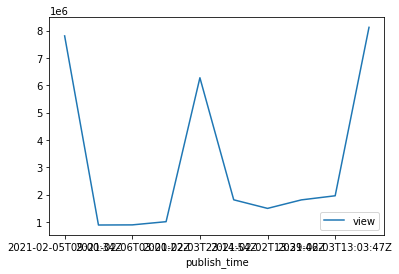

In [8]:
data_view = df["view"].copy()
df_view = data_view.to_frame()
df_view.set_index(df.index, inplace=True)
df_view[:10].plot(legend=True)